In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

### Reading the CSV file into pandas dataframe

In [2]:
salary_df = pd.read_csv("Salary.csv")  

In [3]:
salary_df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


### Data structure

In [4]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


### Data Summary

In [5]:
salary_df.describe()

,YearsExperience,Age,Salary
count,30.000000,30.000000,30.000000
mean,5.313333,27.216667,76003.000000
std,2.837888,5.161267,27414.429785
min,1.100000,21.000000,37731.000000
25%,3.200000,23.300000,56720.750000
50%,4.700000,25.000000,65237.000000
75%,7.700000,30.750000,100544.750000
max,10.500000,38.000000,122391.000000


### Data Distribution

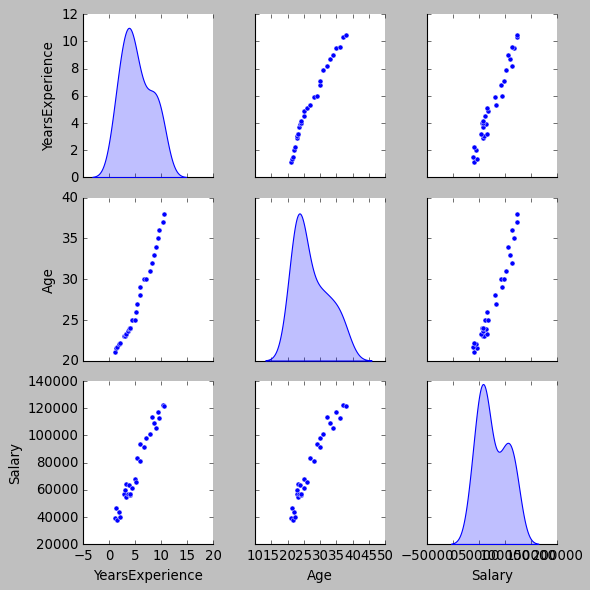

In [6]:
sns.pairplot(salary_df, diag_kind='kde')  

### Correlation Plot

<AxesSubplot:>

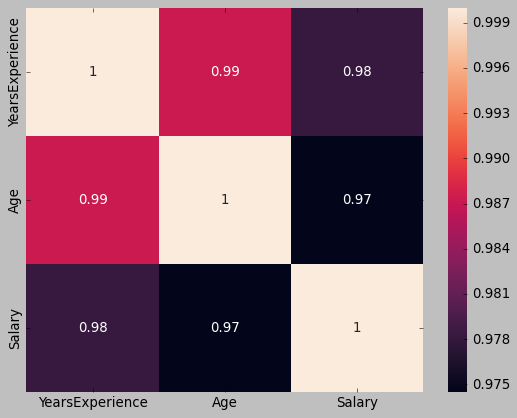

In [7]:
sns.heatmap(salary_df.corr(),annot=True)

### Train Test Split

In [8]:
X=salary_df.YearsExperience
y=salary_df.Salary

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

## Option 1 - using sklearn.linear_model

In [9]:
# invoke the LinearRegression function and find the bestfit model on training data
print('X Train Shape: ',X_train.shape)
regression_model = LinearRegression()
regression_model.fit(np.array(X_train).reshape(21, 1), y_train)

X Train Shape:  (21,)


LinearRegression()

### Coefficient of YearsExperience

In [10]:
print("The coefficient for {} is {}".format(salary_df.columns[0],regression_model.coef_[0]))

The coefficient for YearsExperience is 9202.233598254636


### Intercept

In [21]:
intercept = regression_model.intercept_

print("The intercept is {}".format(intercept))

The intercept is 26049.577715443353


### Rsquare

In [22]:
# On the training data
regression_model.score(np.array(X_train).reshape(21, 1), y_train)

0.960775692121653

This R square value indicates 96% percentage of variation in the target variable is explained by the predictors in the model

In [23]:
regression_model.score(np.array(X_test).reshape(len(X_test), 1), y_test)

0.9248580247217075

### Option 2 -  using Statsmodel

In [24]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,YearsExperience,Salary
22,7.9,101302
23,8.2,113812
4,2.2,39891
2,1.5,37731
25,9.0,105582


In [25]:
# Fit the OLS model and get the params
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Salary ~ YearsExperience', data = data_train).fit()
lm1.params

Intercept          26049.577715
YearsExperience     9202.233598
dtype: float64

In [26]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     465.4
Date:                Sat, 21 May 2022   Prob (F-statistic):           8.01e-15
Time:                        13:34:29   Log-Likelihood:                -210.64
No. Observations:                  21   AIC:                             425.3
Df Residuals:                      19   BIC:                             427.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.605e+04   2487.895     

Null Hypothesis - All regression co-efficients are 0  
Alternate Hypothesis - Atleast 1 co-efficient is non-zero  
  
The overall P value is much less than alpha of 5%, which indicates the model is a valid model rejecting null hypothesis, and atleast 1 regression co-efficient is not 0.

### Mean Squared Error

In [27]:
mse = np.mean((regression_model.predict(np.array(X_test).reshape(9, 1))-y_test)**2)

In [28]:
import math

math.sqrt(mse)

6256.134269625979

In [29]:
y_pred = regression_model.predict(np.array(X_test).reshape(9, 1))

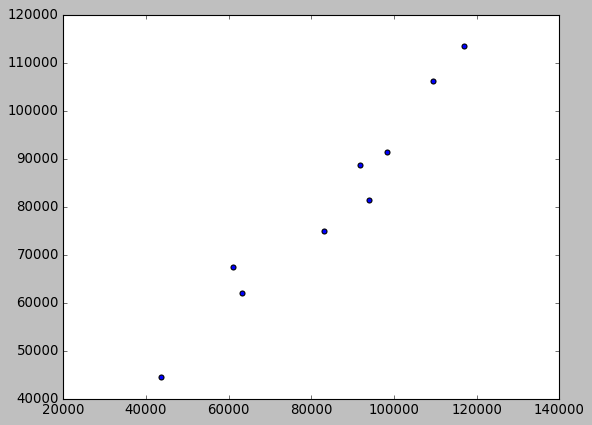

In [30]:
plt.scatter(y_test, y_pred)

# Conclusion

The Final Linear Regression equation is Salary = b0 + b1 * YearsExperience   
   
i.e Salary = 26049.577 + 9202.233 * YearsExperience

The default salary when there is no experience is 26050 units.  
If the employee has an experience, for every 1 unit increase in the years of experience, the salary increases by 9202 units.  
i.e When exp is 1 year, salary is (26049.577 + (9202.233 * 1)) = 35252 units  
When exp is 2 years, salary is (26049.577 + (9202.233 * 2)) = 44454 units  